# Sudoku Solver

In [1]:
import matplotlib.pyplot as plt
from copy import deepcopy

from utils.algorithmx import Matrix, search, search_util

## Helper functions

In [2]:
def render_sudoku_image(sudoku):
    
    for i in range(10):
        if i%3==0:
            lw = 2
        else:
            lw = 1
            
        plt.plot([0, 9], [i, i], color="black", linewidth=lw)
        plt.plot([i, i], [0, 9], color="black", linewidth=lw)
        
    for i in range(9):
        for j in range(9):
            value = sudoku[i][j]
            if value != '.':
                if value[0]=='*':
                    plt.text(j + 0.5, 8.5 - i, value.strip('*'), fontsize=16, ha='center', va='center')
                else:
                    plt.text(j + 0.5, 8.5 - i, value, fontsize=16, ha='center', va='center', color='blue')
                

    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.axis('off')
    plt.gca().set_aspect('equal')

## Incidence matrix

In [3]:
A = [[0]*324 for i in range(729)]

def idx(r, c, n):
    return int(81*r + 9*c + n)

# Row-Column constraint 0-80
for r in range(9):
    for c in range(9):        
        col = 9*r+c
        for i in range(9):
            A[idx(r,c,i)][col] = 1
            
# Row-Number constraint 81-161
for r in range(9):
    for i in range(9):
        col = 9*r+i+81
        for c in range(9):
            A[idx(r,c,i)][col] = 1
            
# Column-Number constraint 162-242
for c in range(9):
    for i in range(9):
        col = 9*c+i+162
        for r in range(9):
            A[idx(r,c,i)][col] = 1
            
# Box-Number constraint 243-323
for b in range(9):
    for i in range(9):
        col = 9*b + i + 243
        for k in range(9):
            x = int((27*(b//3) + 3*(b%3)) + (9*(k//3) + k%3))
            r = (x//9)
            c = (x%9)
            A[idx(r,c,i)][col] = 1

## Test cases

In [6]:
sudoku_tests = [
    [
        ["5", "3", ".", ".", "7", ".", ".", ".", "."],
        ["6", ".", ".", "1", "9", "5", ".", ".", "."],
        [".", "9", "8", ".", ".", ".", ".", "6", "."],
        ["8", ".", ".", ".", "6", ".", ".", ".", "3"],
        ["4", ".", ".", "8", ".", "3", ".", ".", "1"],
        ["7", ".", ".", ".", "2", ".", ".", ".", "6"],
        [".", "6", ".", ".", ".", ".", "2", "8", "."],
        [".", ".", ".", "4", "1", "9", ".", ".", "5"],
        [".", ".", ".", ".", "8", ".", ".", "7", "9"],
    ],
    [
        [".", ".", ".", "2", ".", ".", ".", "6", "3"],
        ["3", ".", ".", ".", ".", "5", "4", ".", "1"],
        [".", ".", "1", ".", ".", "3", "9", "8", "."],
        [".", ".", ".", ".", ".", ".", ".", "9", "."],
        [".", ".", ".", "5", "3", "8", ".", ".", "."],
        [".", "3", ".", ".", ".", ".", ".", ".", "."],
        [".", "2", "6", "3", ".", ".", "5", ".", "."],
        ["5", ".", "3", "7", ".", ".", ".", ".", "8"],
        ["4", "7", ".", ".", ".", "1", ".", ".", "."],
    ],
    [
        [".", ".", ".", ".", ".", ".", ".", ".", "."],
        [".", "9", ".", ".", "1", ".", ".", "3", "."],
        [".", ".", "6", ".", "2", ".", "7", ".", "."],
        [".", ".", ".", "3", ".", "4", ".", ".", "."],
        ["2", "1", ".", ".", ".", ".", ".", "9", "8"],
        [".", ".", ".", ".", ".", ".", ".", ".", "."],
        [".", ".", "2", "5", ".", "6", "4", ".", "."],
        [".", "8", ".", ".", ".", ".", ".", "1", "."],
        [".", ".", ".", ".", ".", ".", ".", ".", "."],
    ],
    [
        ["2", ".", "3", "6", "5", ".", "8", ".", "7"],
        [".", "1", ".", ".", "8", ".", ".", "6", "."],
        ["8", ".", ".", ".", ".", ".", ".", ".", "5"],
        [".", ".", ".", "8", "3", "6", ".", ".", "1"],
        ["5", "8", ".", "1", ".", "4", ".", "3", "6"],
        ["1", ".", ".", "9", "2", "5", ".", ".", "."],
        ["6", ".", ".", ".", ".", ".", ".", ".", "3"],
        [".", "5", ".", ".", "6", ".", ".", "7", "."],
        ["3", ".", "7", ".", "1", "2", "6", ".", "8"],
    ]
]


## Solutions

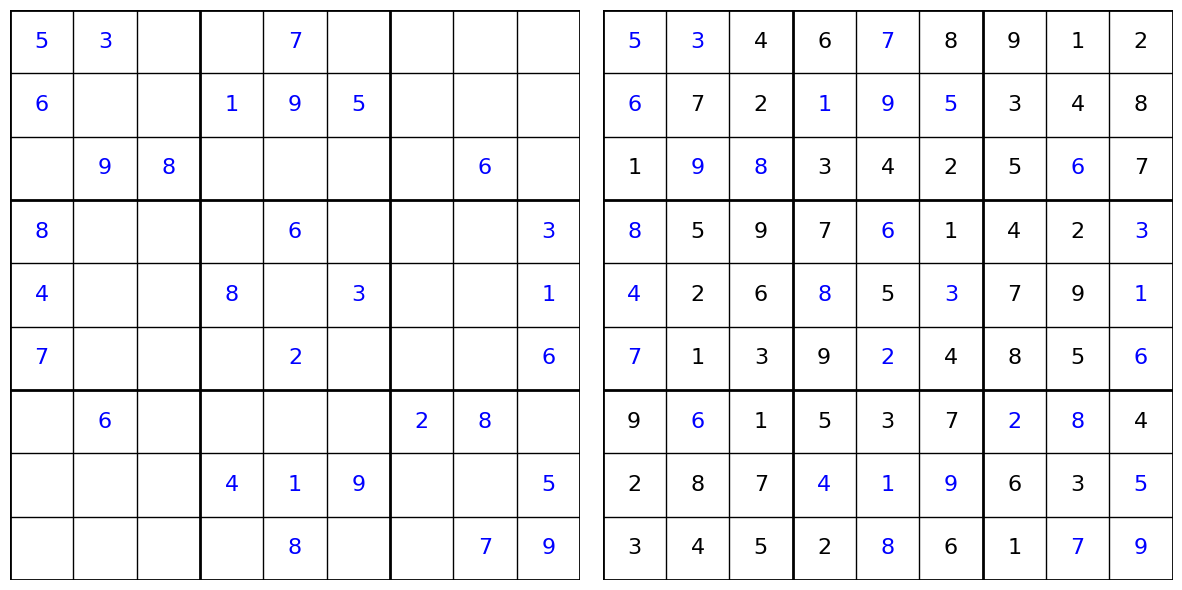

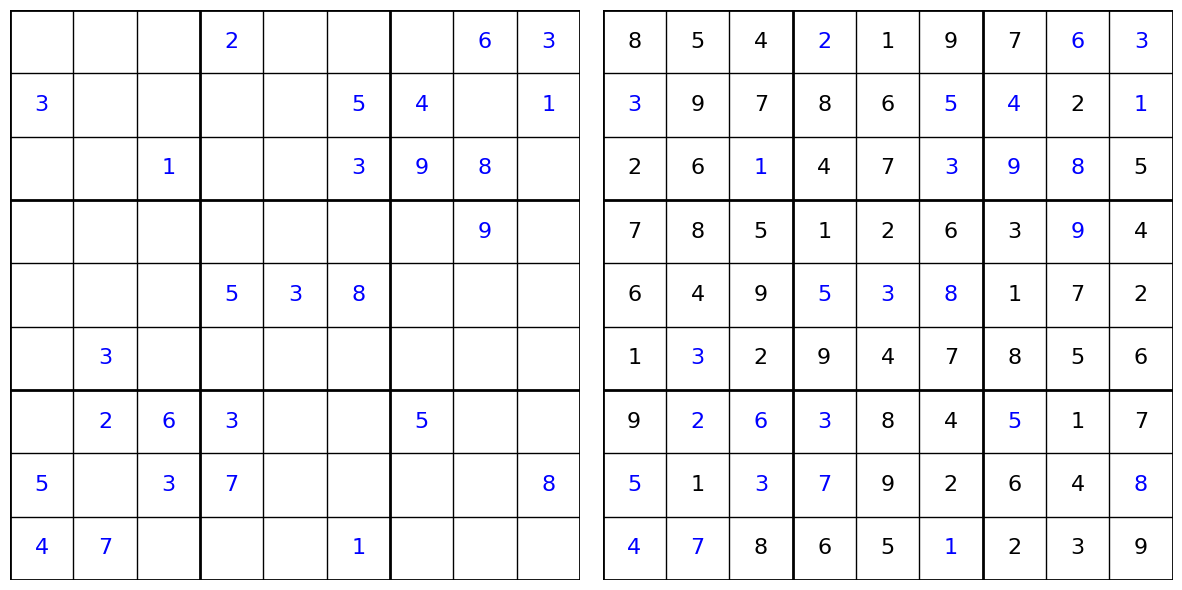

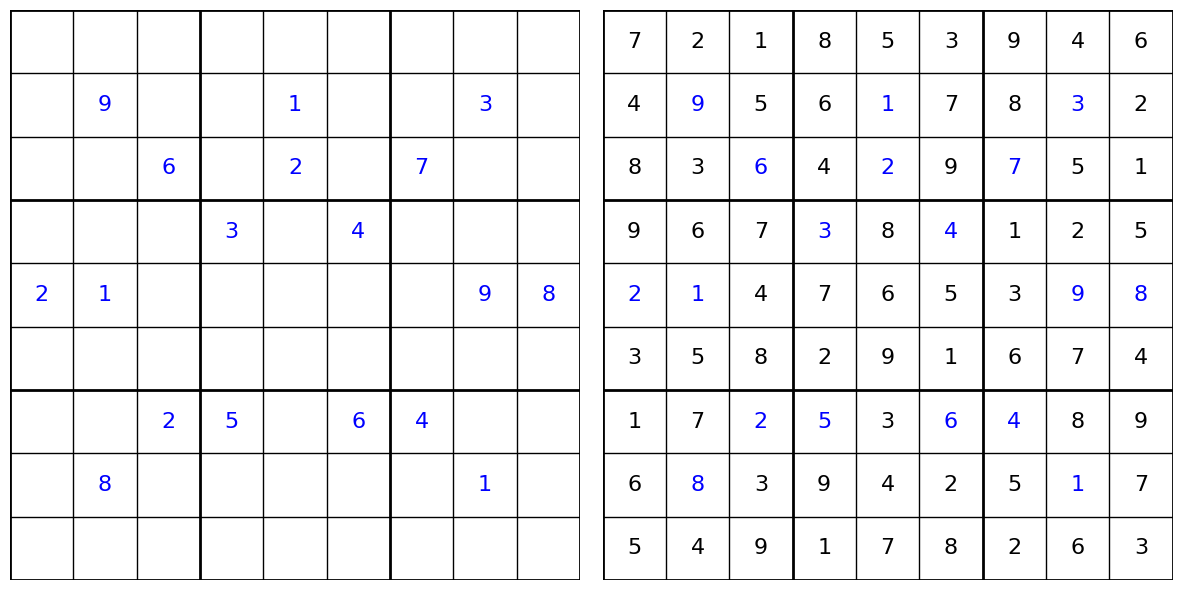

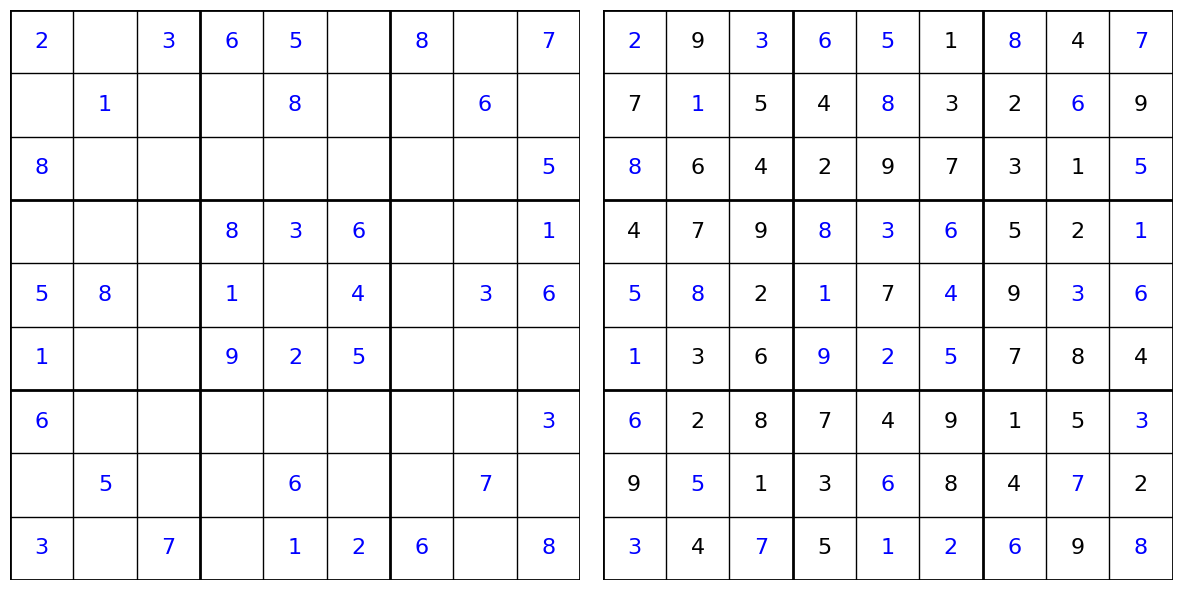

In [7]:
column_names = [i for i in range(324)]
row_names = [(r,c,i) 
             for r in range(9) 
             for c in range(9) 
             for i in range(9)]

for t, sudoku in enumerate(sudoku_tests):
    mat = Matrix(A, column_names, row_names)
    solved_sudoku = deepcopy(sudoku)
    for r in range(9):
        for c in range(9):
            if sudoku[r][c]!=".":
                num = int(sudoku[r][c])-1
                index = idx(r,c,num)
                for i in range(324):
                    if A[index][i] == 1:
                        mat.cover(i)

    sol = []
    sol_array = []
    search_util(0,mat,sol,sol_array)

    for s in sol_array[0]:     
        r, c, i = s.row_name
        solved_sudoku[r][c] = "*"+str(i+1)
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    render_sudoku_image(sudoku)
    plt.subplot(1,2,2)
    render_sudoku_image(solved_sudoku)
    plt.tight_layout()
    plt.savefig(f'results/sudoku_solution_{t}.png', facecolor=(1,1,1,1))
    